<a href="https://colab.research.google.com/github/rmartin977/Covid-19-data/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting covid data for US
  Robert Martin
  June, 22, 2020

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'  #. this will give quality plots
plt.style.use('ggplot')

## To get covid data:  Google "Johns Hopkins Corona Virus data github"

In [2]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

In [3]:
data = pd.read_csv(url) # read the data into a pandas dataframe

## Look at some data

In [4]:
data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107,107,107,107,107,107,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,109,109,110,110,110,110,110,110,110,110,110,110,111,111,111,112,112,112,113
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,305,305,306,306,306,306,307,307,307,308,308,308,308,309,309,309,310,310,310,310,310,310,310,310,310,310,310,310,310,311,311,311,311,311,311,312,312,312,312,312
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,56,56,56,56,56,56,56,57,57,57,57,57,57,56,56,56,56,56,56,56,56,58,58,58,58,58,58,58,58,59,59,59,59,59,59,59,59,59,59,59
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,63,63,63,63,63,63,63,63,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,135,135,135,135,135,135,136,136,137,137,137,137,137,137,137,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139


In [ ]:
# We extract the column data starting at March 1,2020
data_m = data.loc[:,'3/1/20':]

In [ ]:
# total the deaths for each day (column)
deaths = data_m.sum() 

In [ ]:
deaths[:7] # notice deaths is a pandas series giving the cumulative deaths

3/1/20     1
3/2/20     6
3/3/20     7
3/4/20    11
3/5/20    12
3/6/20    14
3/7/20    17
dtype: int64

In [ ]:
# to get the deaths for each day we do a first difference
daily = np.diff(deaths)
daily = np.insert(daily,0,1) # fix March 1
daily[:10] # We interpret below to say 5 deaths occured on March 2

array([1, 5, 1, 4, 1, 2, 3, 4, 1, 6])

<BarContainer object of 128 artists>

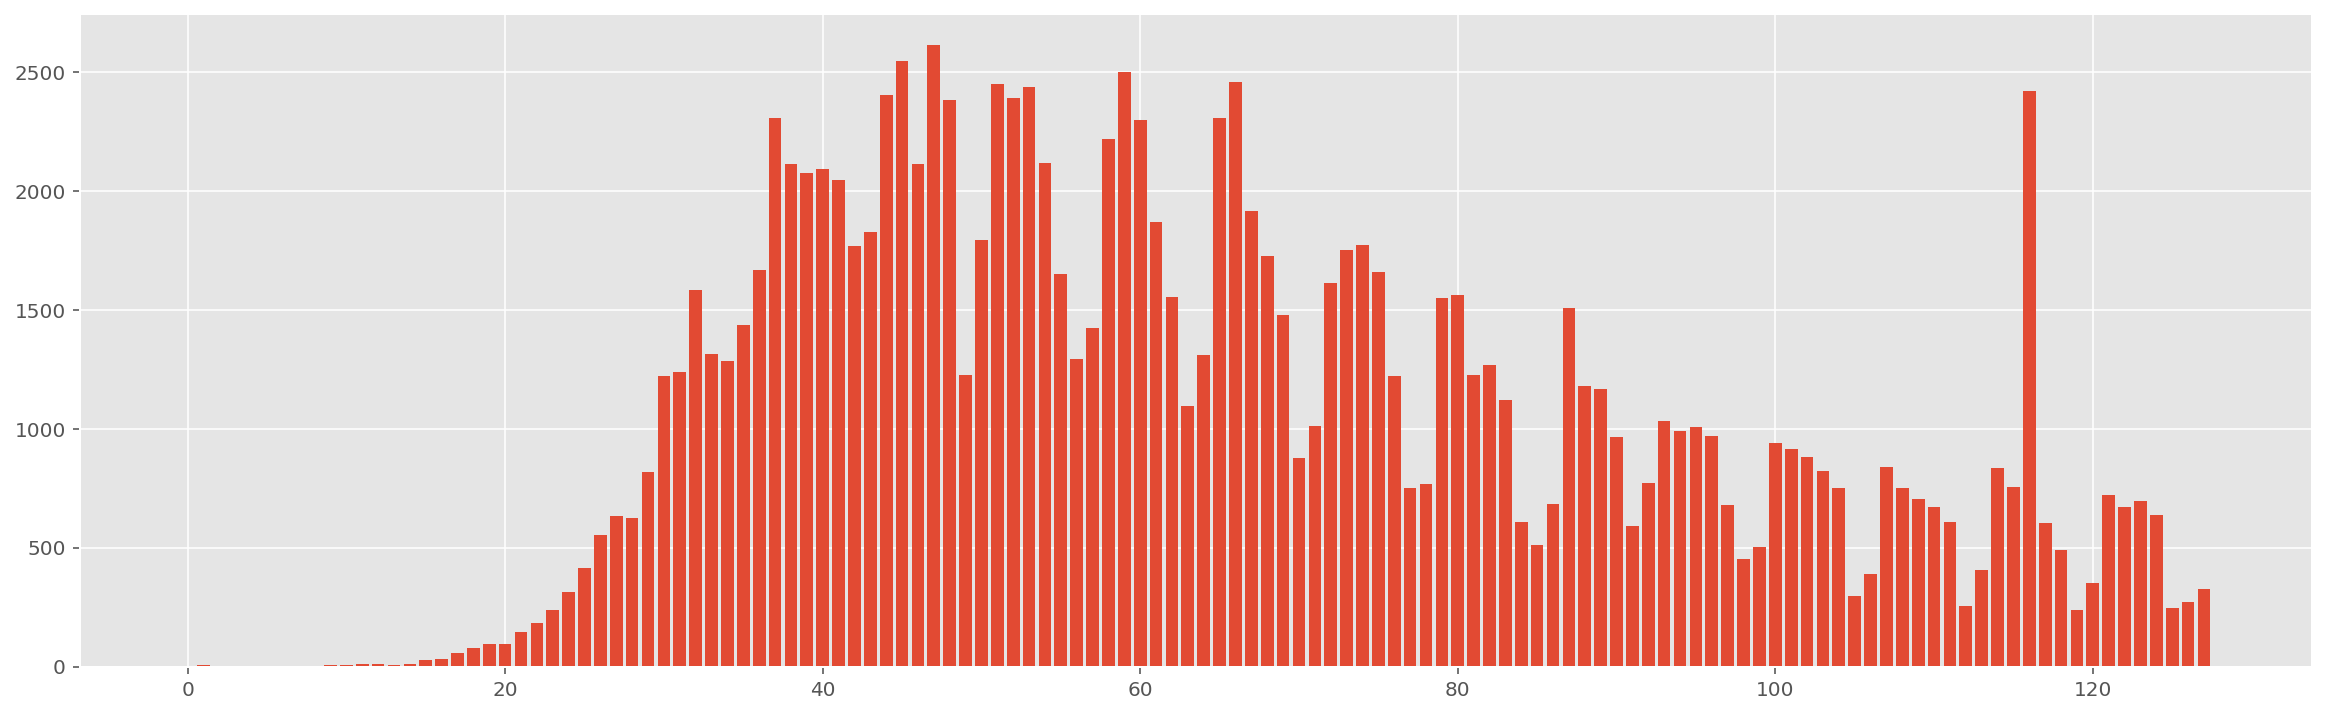

In [ ]:
# plot the data
x = np.arange(len(daily))
plt.figure(figsize=(20,6))
plt.bar(x,daily)

In [ ]:
# Find 7 day moving aveage
w = 1/7 * np.ones(7)
mov_avg = np.convolve(daily,w,'valid')

In [ ]:
(len(daily),len(mov_avg))

(128, 122)

In [ ]:
#pad some zeros
mov_avg = np.hstack((np.zeros(6),mov_avg))

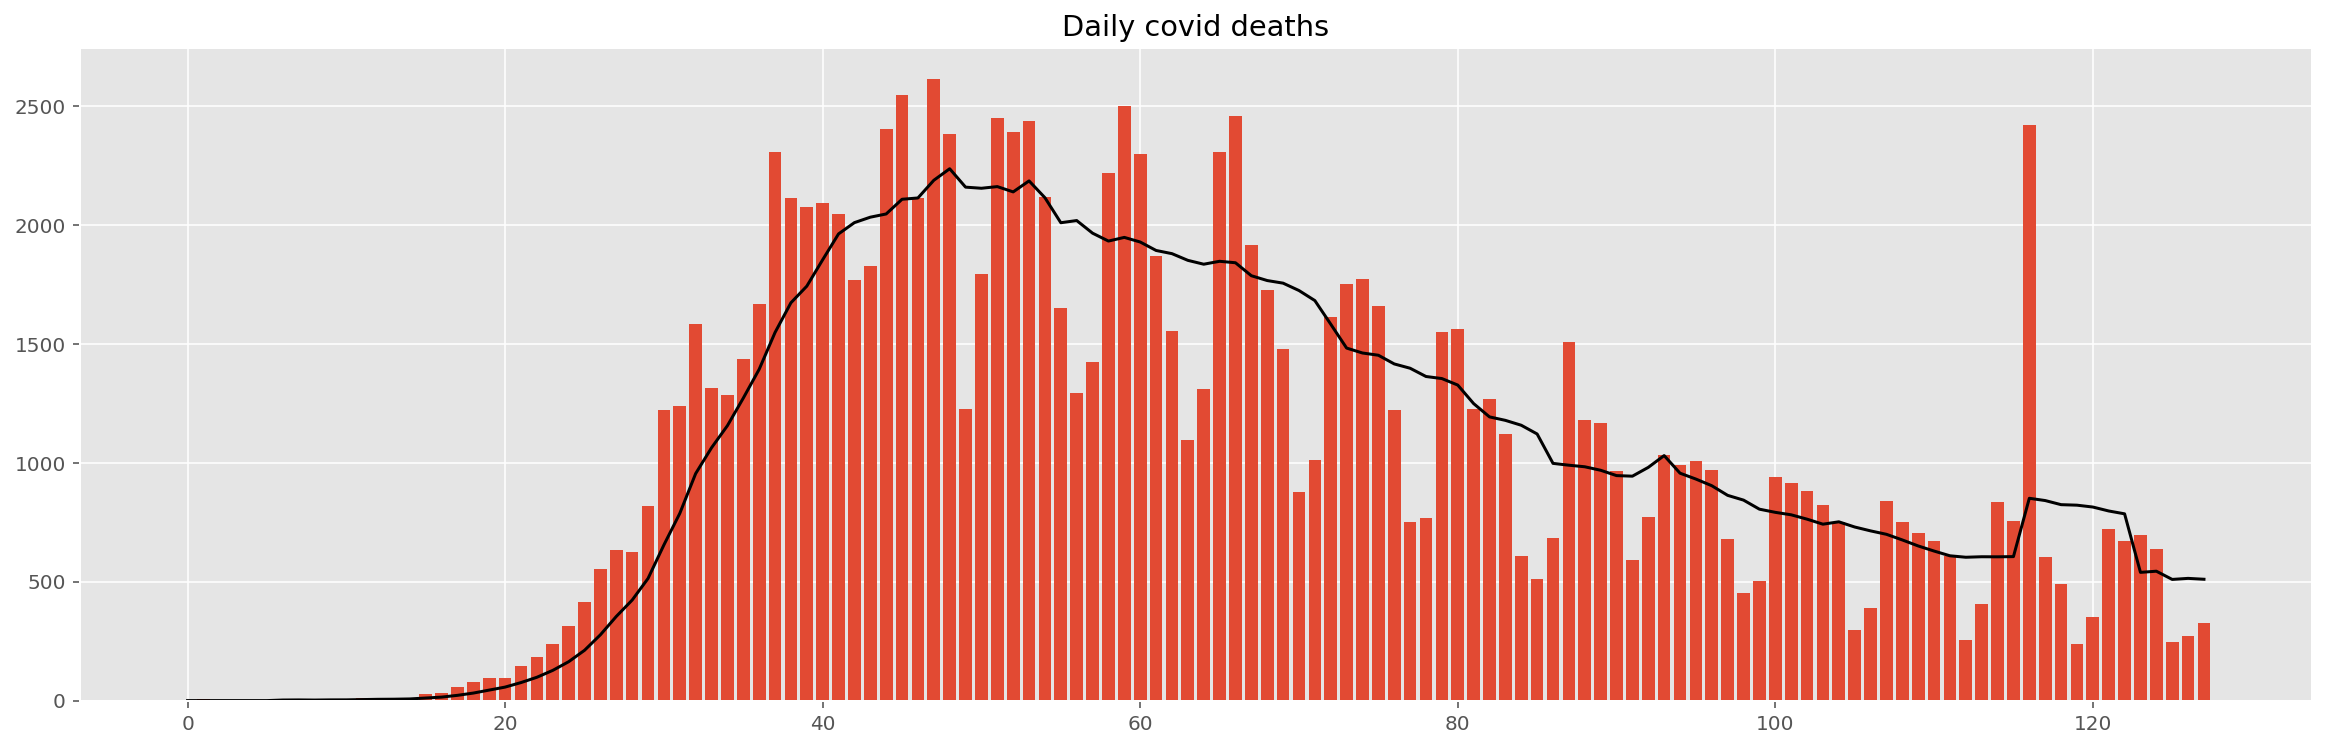

In [ ]:
# plot the data with moving average
x = np.arange(len(daily))
plt.figure(figsize=(20,6))
plt.bar(x,daily)
plt.plot(mov_avg,c='k')
plt.title("Daily covid deaths");

## Make a new dataframe with two columns showing cumulative and daily deaths

In [ ]:
df = pd.DataFrame({"cumulative" : deaths.values,"daily":daily},index = deaths.index)
df[:15].T

,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
cumulative,1,6,7,11,12,14,17,21,22,28,33,43,52,58,70
daily,1,5,1,4,1,2,3,4,1,6,5,10,9,6,12


## Now we want the x-axis to dispay dates

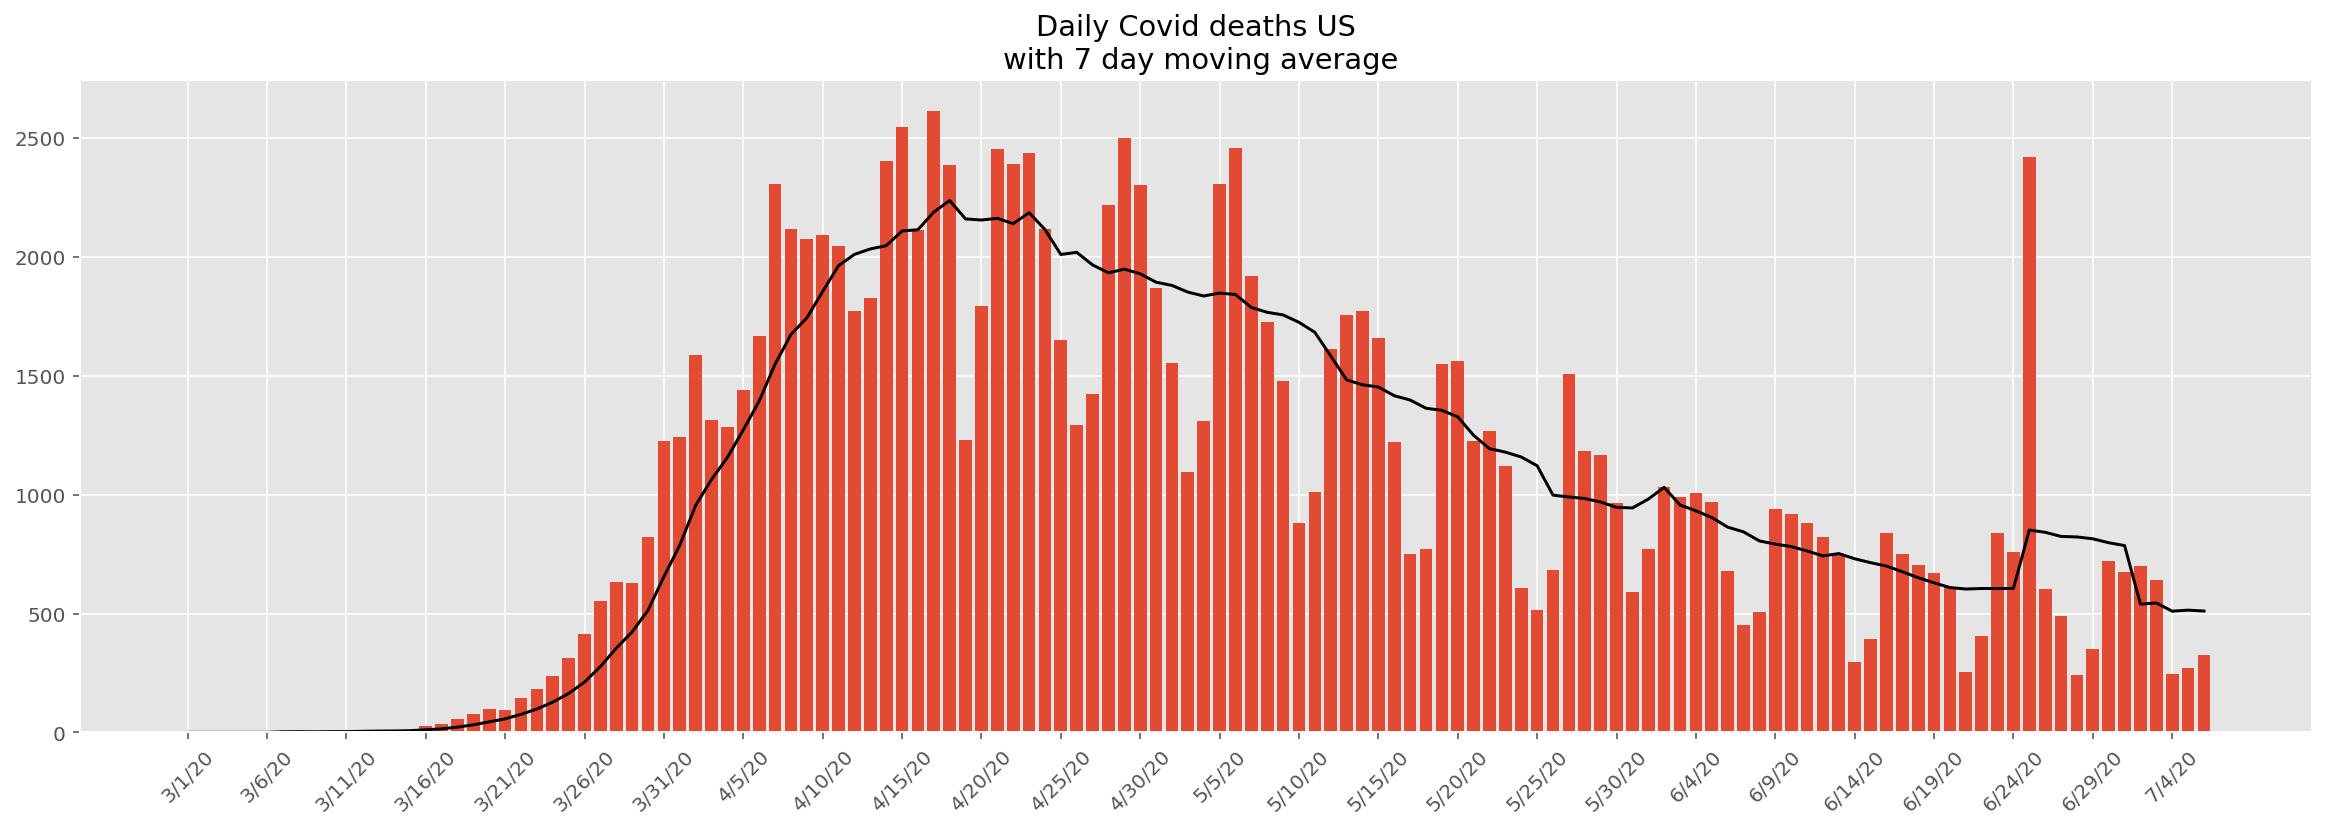

In [ ]:

plt.figure(figsize=(20,6))
plt.bar(df.index,df['daily'])
plt.plot(mov_avg,c = 'k')
loc,labels = plt.xticks()
plt.xticks(np.arange(len(mov_avg))[::5],rotation=45);
plt.title('Daily Covid deaths US\n with 7 day moving average');
plt.savefig('covid.png')


In [ ]:
plt.savefig('covid.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,matplotlib,watermark 

# date
print (" ")
%watermark -u -n -t -z

CPython 3.7.6
IPython 7.12.0

wget 3.2
pandas 1.0.1
numpy 1.15.0
matplotlib 3.1.3
watermark 2.0.2

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.5.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
 
last updated: Tue Jul 07 2020 22:20:39 EDT
